In [21]:
# impport basic libarary
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly_express as px
import klib

### load the data


In [22]:
data=pd.read_csv('insurance.csv')
data.shape

(1338, 7)

- the data contain `1338` rows and `7` columns

In [23]:
#show the first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
#show the last 5 rows of data
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [25]:
#data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.665471,6.098382,16.000000,26.300000,30.400000,34.700000,53.100000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
expenses,1338.000000,13270.422414,12110.011240,1121.870000,4740.287500,9382.030000,16639.915000,63770.430000


### chack the feature correlation

C:\Users\abrah\AppData\Local\Temp\ipykernel_19848\250165253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

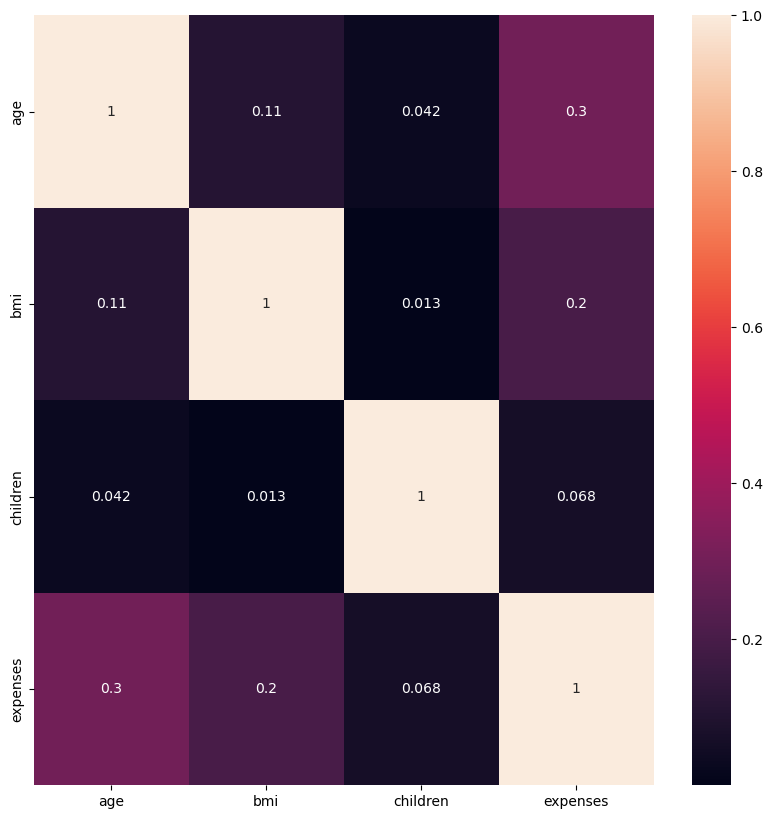

In [27]:
fig,ax=plt.subplots(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

### Save object

In [30]:
import pickle

def save_object(obj,name):
    pickle_obj=open(f'{name}.pck','wb')
    pickle.dump(obj,pickle_obj)
    pickle_obj.close()
    

### lable encode object type

In [31]:
d_type=dict(data.dtypes)
for name ,type in d_type.items():
    if type=='object':
        print(f'<============{name}============>')
        print(data[name].value_counts())
        print()

<============sex============>
male      676
female    662
Name: sex, dtype: int64

<============smoker============>
no     1064
yes     274
Name: smoker, dtype: int64

<============region============>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [32]:
from sklearn.preprocessing import LabelEncoder
for name ,type in d_type.items():
    if str(type)=='object':
        le=LabelEncoder()
        data[name]=le.fit_transform(data[name])
        save_object(le,f'LabelEncoder_{name}')

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
part=onehot.fit_transform(data['region'].values.reshape(-1,1)).toarray()
save_object(onehot,f'OneHotEncoder_region')

values=dict(data['region'].value_counts())

for e,(val,_) in enumerate(values.items()):
    data['region_'+str(val)]=part[:,e]
data=data.drop(['region'],axis=1)
data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


### check the type after encode

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 94.2 KB


In [35]:
data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


### hendle skewness in predicitive columns

In [36]:
original_y=data['expenses'].values.copy()
original_y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

the skewness in colums  1.51587966289798


<Axes: xlabel='expenses', ylabel='Density'>

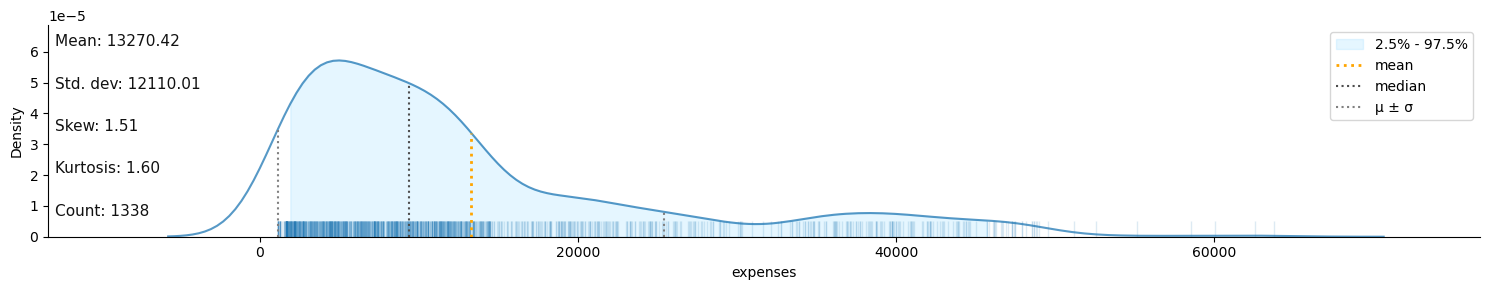

In [37]:
print('the skewness in colums ',data['expenses'].skew())

klib.dist_plot(data['expenses'])


the skewness in columns : log expenses -0.0900974307762623


<Axes: xlabel='expenses', ylabel='Density'>

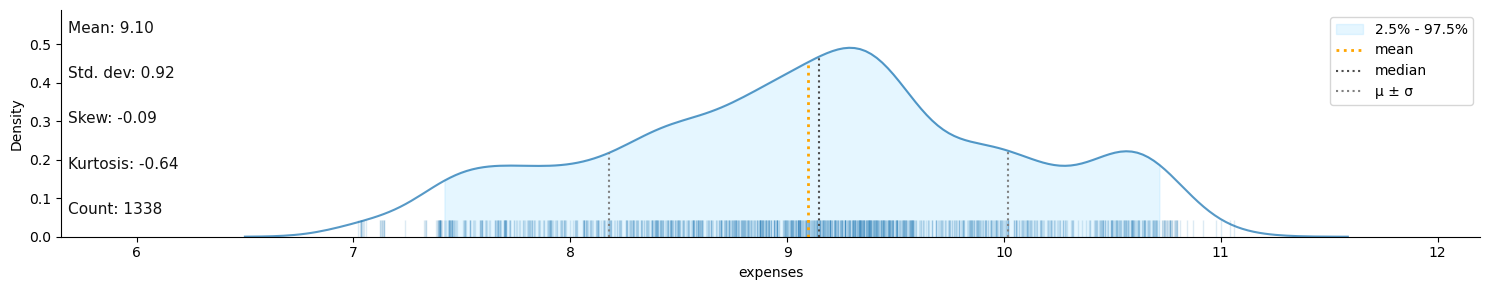

In [38]:
col_log=np.log(data['expenses'])
print('the skewness in columns : log expenses',col_log.skew())
klib.dist_plot(col_log)

the skewnesses in columns : squrt expenese 0.7958625295340573


<Axes: xlabel='expenses', ylabel='Density'>

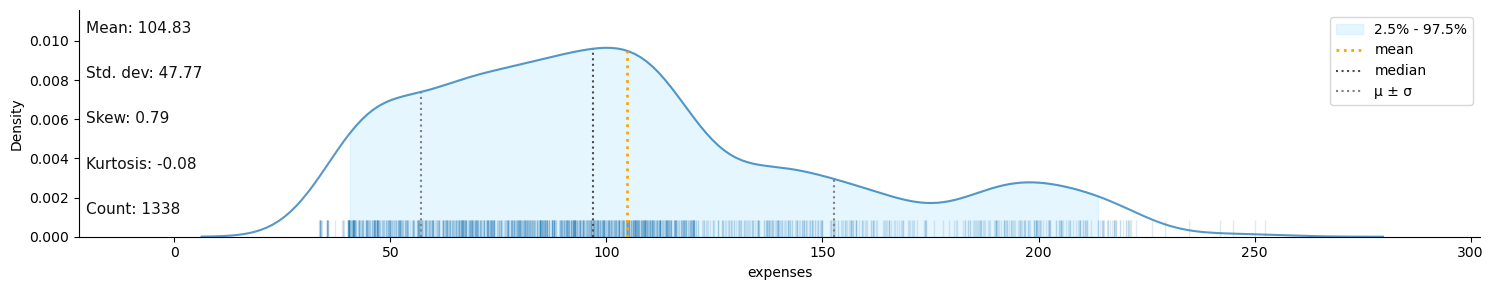

In [39]:
col_sqrt=np.sqrt(data['expenses'])
print('the skewnesses in columns : squrt expenese',col_sqrt.skew())
klib.dist_plot(col_sqrt)

skewnesses in columns : boxcox exprenes  -0.008734062011873602


<Axes: xlabel='0', ylabel='Density'>

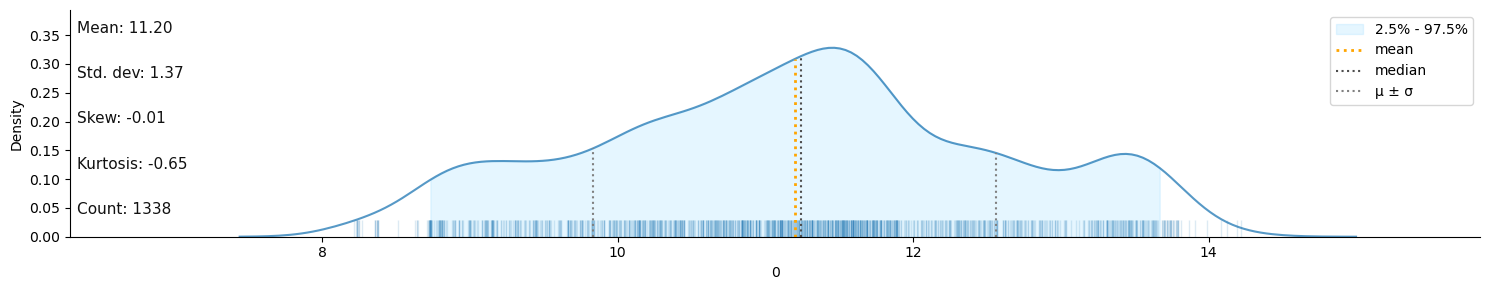

In [40]:
from scipy import stats
col_cox,lam=stats.boxcox(data['expenses'])[0:2]
print('skewnesses in columns : boxcox exprenes ',pd.Series(col_cox).skew())

save_object(lam,f'boxcom_lambda')

klib.dist_plot(col_cox)

In [41]:
data['expenses']=col_cox

In [45]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

save_object(remaining_columns, f'columns')

In [46]:
X = data[remaining_columns].values 
y = data['expenses'].values

In [47]:
X.shape,y.shape

((1338, 9), (1338,))

### split data into train and test 

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=44)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
save_object(scaler,f'scaler')

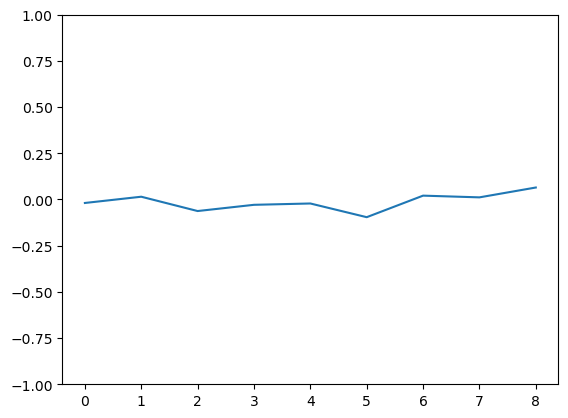

In [50]:
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means,scaley=False)

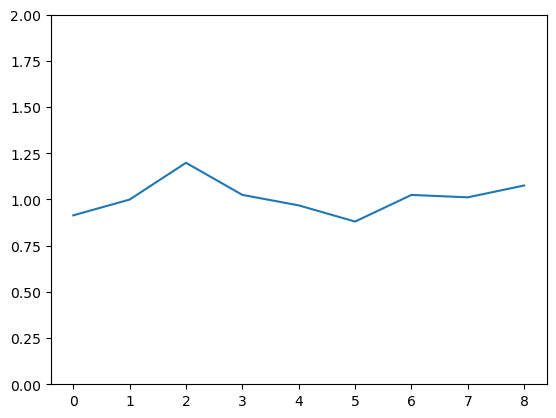

In [51]:
#check variance of testset
plt.ylim(0,2)
means=[]
for i in range(X.shape[1]):
    means.append(np.var(X_test[:,i]))
plt.plot(means,scaley=False)

# Linear model

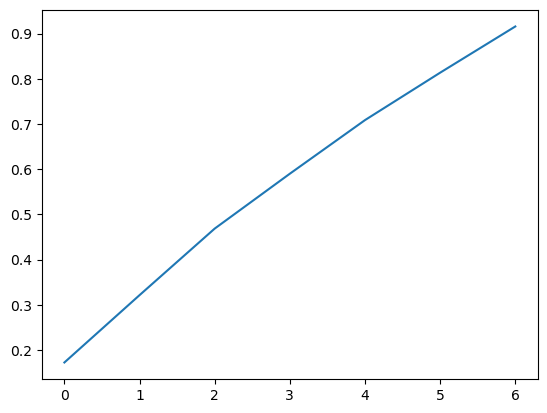

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=7,svd_solver='auto')
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
plt.plot(pca.explained_variance_ratio_.cumsum())
save_object(pca,f'PCA')

In [56]:
def r2_score(y_test , y_pred):
    numenator = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    denominator = (1/len(y_test))*np.sum((y_test - np.mean(y_test))**2)
    return (1 - (numenator/denominator))

def adj_r2_score(y_test , y_pred , n_features):
    numenator = (1-r2_score(y_test , y_pred))*(len(y_test) - 1)
    denominator = len(y_test) - n_features - 1
    return 1 - (numenator/denominator)

In [53]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
save_object(linear_model,f'my_linear_model')


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred=linear_model.predict(X_test)

print('mean_squared_error: ',mean_absolute_error(y_pred,y_test))
print('mean_squared_error: ',np.sqrt( mean_squared_error(y_pred,y_test)))
print('r2_score: ',r2_score(y_test,y_pred))
print('adj_r2_score:',adj_r2_score(y_test,y_pred,X_test.shape[1]))


mean_squared_error:  0.402027318721335
mean_squared_error:  0.6372284756267528
r2_score:  0.7655763367061708
adj_r2_score: 0.7592649303867215


# Realtime model

In [59]:
# impport basic libarary
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly_express as px
import klib
import pickle

In [70]:
def load_object(name):
    pickle_obj=open(f'{name}.pck','rb')
    obj=pickle.load(pickle_obj)
    return obj

In [107]:
data=pd.read_csv('insurance.csv')

idx=np.random.choice(len(data))

be_predict=data.iloc[idx,:].values

col_name=data.columns
predict_dic={}

for col_name,val in zip(col_name,be_predict):
    predict_dic[col_name]=val

predict_dic

{'age': 51,
 'sex': 'male',
 'bmi': 25.4,
 'children': 0,
 'smoker': 'no',
 'region': 'southwest',
 'expenses': 8782.47}

In [108]:
rel_value=predict_dic['expenses']
del predict_dic['expenses']

### encoder_region

In [109]:
predict_dic['region']=load_object('LabelEncoder_region').transform(np.array(predict_dic['region']).reshape(-1,))

### encoder_sex

In [110]:
predict_dic['sex']=load_object('LabelEncoder_sex').transform(np.array(predict_dic['sex']).reshape(-1,))[0]

### encoder Smoker

In [111]:
predict_dic['smoker']=load_object('LabelEncoder_smoker').transform(np.array(predict_dic['smoker']).reshape(-1,))[0]

### onehotencoder region 

In [112]:
predict_dic['region_']=load_object('OneHotEncoder_region').transform(predict_dic['region'].reshape(-1,1)).toarray()[0]

In [113]:
del predict_dic['region']

In [114]:
for e,i in enumerate(predict_dic['region_']):
    predict_dic['region_'+str(e)]=i

In [115]:
del predict_dic['region_']

In [116]:
predict_dic

{'age': 51,
 'sex': 1,
 'bmi': 25.4,
 'children': 0,
 'smoker': 0,
 'region_0': 0.0,
 'region_1': 0.0,
 'region_2': 0.0,
 'region_3': 1.0}

In [117]:
#lets make the main array

col_sequence=load_object('columns')
array=[]

for col_name in col_sequence:
    array.append(predict_dic[col_name])

array=np.array(array)
print(array)

[51.   1.  25.4  0.   0.   0.   1.   0.   0. ]


In [118]:
array=load_object('scaler').transform(array.reshape(1,-1))

In [119]:
array=load_object('PCA').transform(array)

In [120]:
array

array([[-1.10399109, -0.98590369, -1.51117671,  0.2710139 ,  0.1773026 ,
        -1.49546369, -0.12245281]])

In [121]:
perdition=load_object('my_linear_model').predict(array)
perdition

array([11.0083258])

In [122]:
from scipy.special import inv_boxcox

perdition=inv_boxcox(perdition,load_object('boxcom_lambda'))

perdition

array([8018.22008471])

In [123]:
print(f'the original value  is {rel_value} and the prediction is {perdition}')

the original value  is 8782.47 and the prediction is [8018.22008471]
